In [10]:
### Lab 9 Charles Voigt
#Housekeeping
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay


roc_curve = RocCurveDisplay.from_estimator

In [11]:
# Question 1
Hitters = load_data('Hitters')
Hitters = Hitters.dropna()

High = (Hitters['Salary'] > Hitters['Salary'].median()).astype(int)
X = Hitters[['CHits', 'CWalks']]
y = High

#linear SVM 1 (C = 0.1)
svm_linear1 = SVC(C=0.1, kernel='linear')
svm_linear1.fit(X, y)
#linear SVM 2 (C = 100)
svm_linear2 = SVC(C=100, kernel='linear', max_iter = 1000)
svm_linear2.fit(X, y)

SVC(C=100, kernel='linear', max_iter=1000)

In [12]:
#Question 1 (Continued)
len(svm_linear1.support_)

128

In [13]:
#Question 1 (Continued)
len(svm_linear2.support_)

19

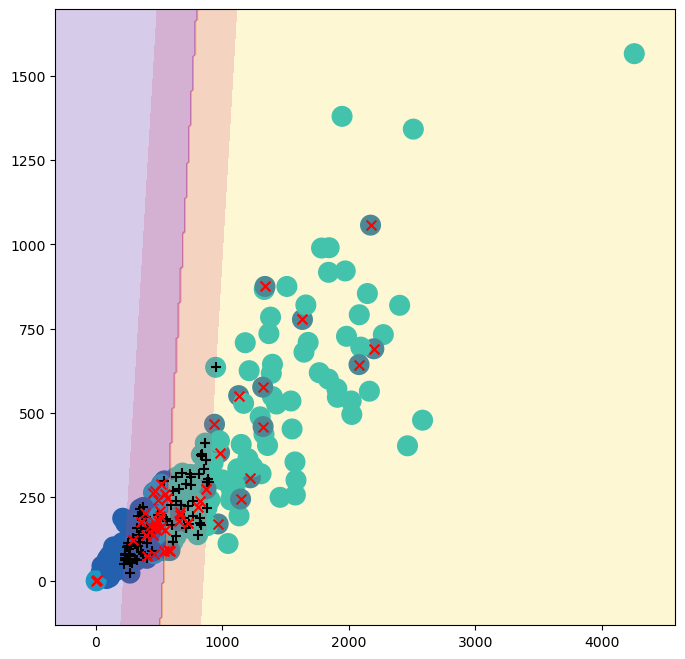

In [14]:
#Question 1 Plots
X_reset = X.reset_index(drop=True)
y_reset = y.reset_index(drop=True)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_reset,  
         y_reset,  
         svm_linear1,
         ax=ax)


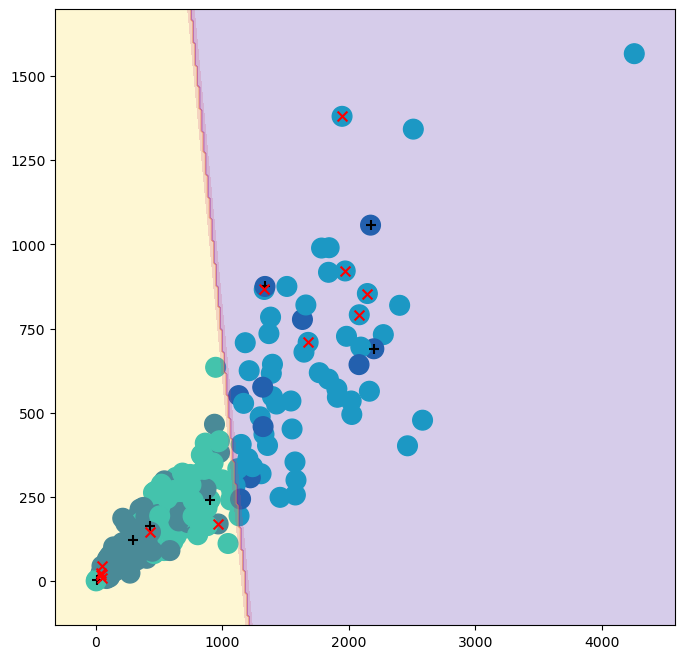

In [15]:
#Question 1 Plots
fig, ax = subplots(figsize=(8,8))
plot_svm(X_reset,  
         y_reset,  
         svm_linear2,
         ax=ax)

#### Question 1 Discussion
The C parameter affects the margin width directly. A large C will have a tighter margin width and allow less support vectors, and a small C will have a larger margin width and allow more support vectors. Thus, the larger C value will be a less flexible model, and vice versa for a smaller C value. \
\
In our case, The number of support vectors is 128 for both C = 0.1 and 19 for C = 100, and the model flexibility seems to be much less for the C = 100, which is aligned with the lower number of support vectors.

In [19]:
#Question 2
from sklearn.model_selection import GridSearchCV

kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best C
grid_search = GridSearchCV(SVC(kernel='linear',  max_iter=1000),
                          param_grid,
                          cv=kfold,
                          scoring='accuracy')
grid_search.fit(X, y)

print("Best C:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
meanscore_df = pd.DataFrame(grid_search.cv_results_)
print(meanscore_df[['param_C', 'mean_test_score']])

Best C: {'C': 0.1}
Best cross-validation score: 0.5563134978229318
   param_C  mean_test_score
0     0.01         0.496880
1     0.10         0.556313
2     1.00         0.525399
3    10.00         0.525327
4   100.00         0.525327


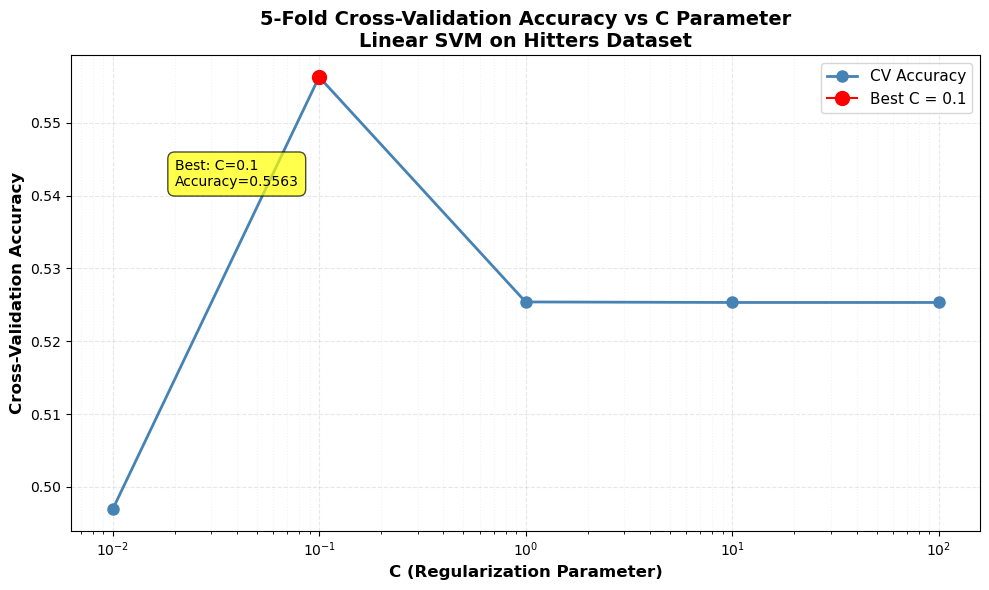

In [24]:
#Question 2 Plot
import matplotlib.pyplot as plt

# Extract data for plotting
C_values = param_grid['C']
mean_scores = meanscore_df['mean_test_score'].values
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CV accuracy vs C
ax.plot(C_values, mean_scores, marker='o', linewidth=2, markersize=8, 
        color='steelblue', label='CV Accuracy')

# Mark the best C value
best_idx = list(C_values).index(best_C)
ax.plot(best_C, mean_scores[best_idx], marker='.', markersize=20, 
        color='red', label=f'Best C = {best_C}', zorder=5)

# Set log scale for x-axis
ax.set_xscale('log')

# Labels and title
ax.set_xlabel('C (Regularization Parameter)', fontsize=12, fontweight='bold')
ax.set_ylabel('Cross-Validation Accuracy', fontsize=12, fontweight='bold')
ax.set_title('5-Fold Cross-Validation Accuracy vs C Parameter\nLinear SVM on Hitters Dataset', 
             fontsize=14, fontweight='bold')

# Grid and legend
ax.grid(True, alpha=0.3, linestyle='--', which='major')
ax.grid(True, alpha=0.15, linestyle=':', which='minor')
ax.legend(fontsize=11, loc='best')

# Add annotation for best C
ax.annotate(f'Best: C={best_C}\nAccuracy={best_score:.4f}', 
            xy=(best_C, mean_scores[best_idx]),
            xytext=(best_C*0.2, mean_scores[best_idx]-0.015),
            fontsize=10, 
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))


plt.tight_layout()
plt.show()

In [ ]:
#Question 3
#synthetic data generation
np.random.seed(42)
X = np.random.randn(200, 2)
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150 + [2]*50)

#Split
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.5, random_state=42)

#RBF SVM 1 (C=1, gamma=1)
svm_rbf_1 = SVC(kernel="rbf",
                C=1,  
                gamma=1, 
                decision_function_shape='ovo');
svm_rbf_1.fit(X_train, y_train)
training_accuracy_1 = svm_rbf_1.score(X_train, y_train)
test_accuracy_1 = svm_rbf_1.score(X_test, y_test)
print(f"RBF SVM (C=1, gamma=1) - Training Accuracy: {training_accuracy_1:.4f}, Test Accuracy: {test_accuracy_1:.4f}")

RBF SVM (C=1, gamma=1) - Training Accuracy: 0.9700, Test Accuracy: 0.8700


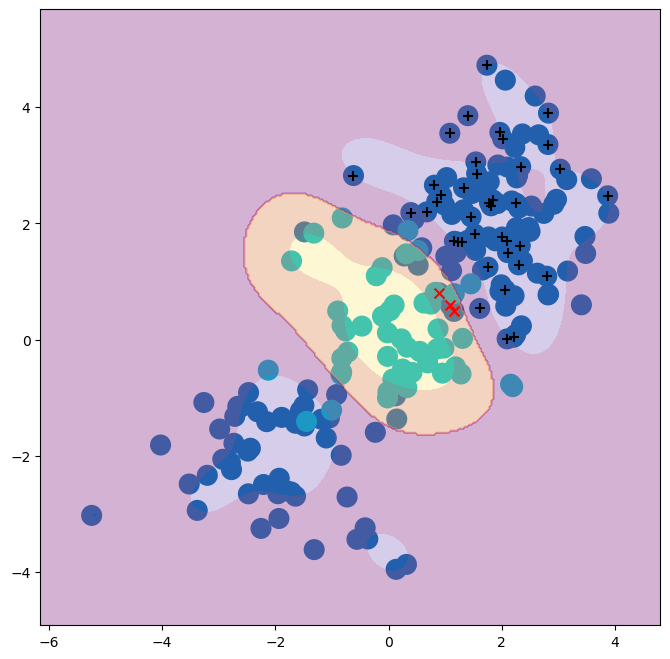

In [33]:
#Question 3 Plot 1
fig, ax = subplots(figsize=(8,8))
plot_svm(X,  
         y,  
         svm_rbf_1,  
         scatter_cmap=cm.tab10, 
         ax=ax)

In [ ]:
#Question 3 - More RBF SVM
#RBF SVM 2 (C=1, gamma=0.1)
svm_rbf_2 = SVC(kernel="rbf", C=1, gamma=0.1)
svm_rbf_2.fit(X_train, y_train)

#RBF SVM 3 (C=10, gamma=10)
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=10)
svm_rbf_3.fit(X_train, y_train)

SVC(C=10, gamma=10)

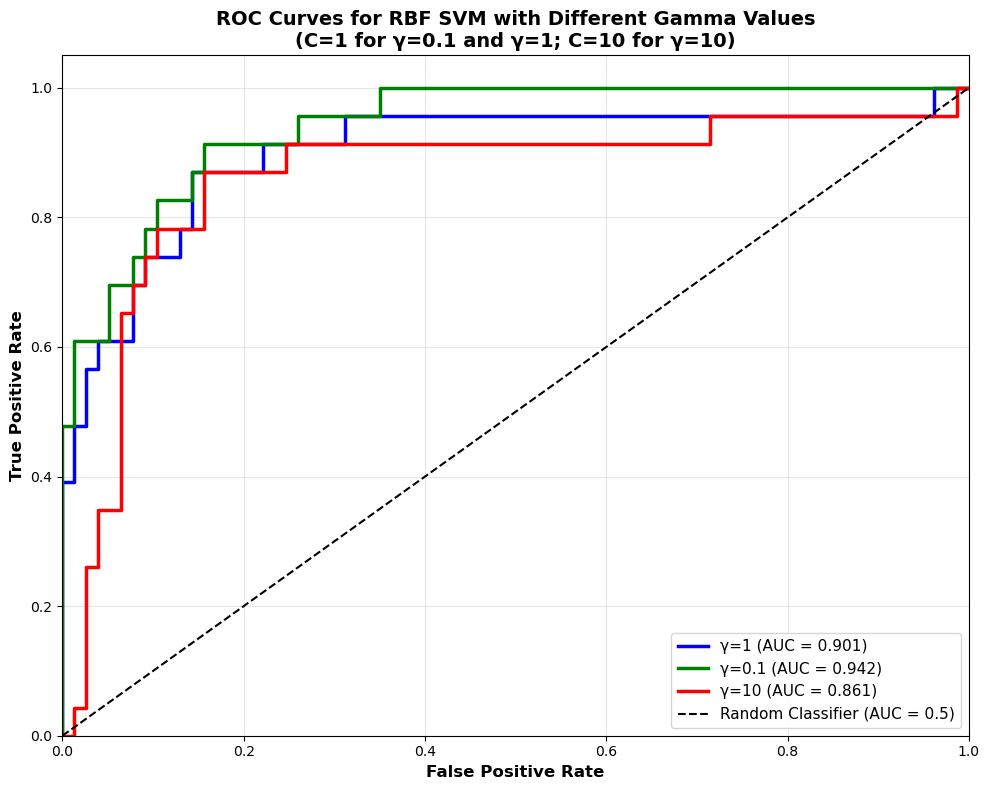

In [41]:
#Question 3 - ROC Curves Plot

# Get decision function scores for each model
y_score_1 = svm_rbf_1.decision_function(X_test)
y_score_2 = svm_rbf_2.decision_function(X_test)
y_score_3 = svm_rbf_3.decision_function(X_test)

# Calculate ROC curves and AUC for each model
fpr_1, tpr_1, _ = roc_curve(y_test, y_score_1, pos_label=2)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_test, y_score_2, pos_label=2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, _ = roc_curve(y_test, y_score_3, pos_label=2)
roc_auc_3 = auc(fpr_3, tpr_3)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC curves
ax.plot(fpr_1, tpr_1, linewidth=2.5, label=f'γ=1 (AUC = {roc_auc_1:.3f})', color='blue')
ax.plot(fpr_2, tpr_2, linewidth=2.5, label=f'γ=0.1 (AUC = {roc_auc_2:.3f})', color='green')
ax.plot(fpr_3, tpr_3, linewidth=2.5, label=f'γ=10 (AUC = {roc_auc_3:.3f})', color='red')

# Plot diagonal reference line
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier (AUC = 0.5)')

# Labels and title
ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curves for RBF SVM with Different Gamma Values\n(C=1 for γ=0.1 and γ=1; C=10 for γ=10)', 
             fontsize=14, fontweight='bold')

# Legend and grid
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

# Set axis limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

#### Question 3 Discussion - Gamma Analysis
This graph shows the ROC curves for RBF models with gammas 1, 0.1, and 10. The Area Under Curve (AUC) shows that the RBF with gamma 0.1 performs best, as it is the best balance of minimizing false positives and maximizing true positives.A lower gamma will be a less complex model, and be less prone to overfitting. In this case, it appears that where gamma = 1, 10, the models tended to have higher false positive rates than where gamma = 0.1, indicating that these more complex models overfit the data.